# Artificial Intelligence exam project

Initial imports:

In [25]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time
from utils import *

In [26]:
!python3 -m minihack.scripts.env_list 

/mnt/c/Users/gioel/Desktop/AIF-Project/env/bin/python3: Error while finding module specification for 'minihack.scripts.env_list' (ModuleNotFoundError: No module named 'minihack')


In [27]:
env = gym.make("MiniHack-Room-Monster-15x15-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render() 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                ........F......                                 
                                ...............                                 
                                ............>..                                 
                                ...............                                 
                                ....@F.........                                 
                                ...............                                 
                                ....Z..........                                 
                                ...............                                 
                           

In [28]:
env.actions
print(env.action_space) 

Discrete(8)


In [29]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

We now save the _state_ dataset's columns of interest:

In [30]:
game_map = state['chars']
game = state['pixel']

Rendering the map with matplotlib:

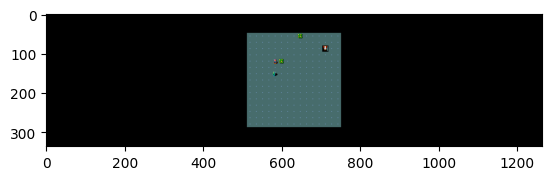

In [31]:
plt.imshow(state['pixel'])

-----------------------------

Method to find out where we are in the map:

In [32]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (7, 36)
Target position: (5, 44)


note: __we can add "set_enemy" and add a char in the matrix to add a monster/villain__ 

to add a monster: F

In [33]:
# game_map = set_enemy(game_map)

In [34]:
# plt.imshow(state['pixel'])

In [35]:
moves = get_valid_moves(game_map, start)
print(moves)

[(7, 35), (8, 36), (7, 37), (6, 36)]


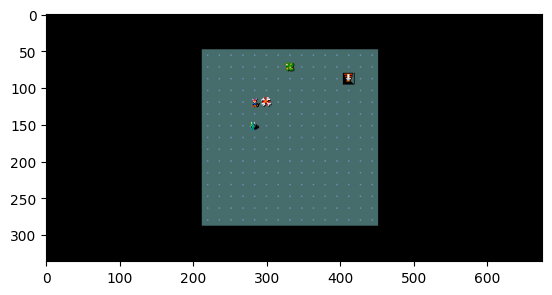

In [ ]:

#inizializzo posizone iniziale e grafico
player_moves = [start]
image = plt.imshow(game[:, 300:975])
print(type(image))
#finchè non arriviamo alla soluzione
end_state=False
while not end_state:
    current_position=get_player_location(game_map)
    moves = get_valid_moves(game_map,current_position) #lista mosse valide
    coord=get_best_move(game_map,current_position,manhattan_distance)

    #stampa e aggiornamento passo
    game_map, _, end_state, _ = env.step(actions_from_path(current_position,[coord])[0])
    game_map=plot_map(game_map,image)
    player_moves.append(coord)
    


sol = actions_from_path(player_moves[0], player_moves[1:]) #lista passi da effettuare
print(sol)
